In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as mat
import matplotlib.pyplot as plt

In [2]:
Thrace = pd.read_excel('Thrace1.xlsx')
Thrace = pd.concat([Thrace, pd.read_excel('Thrace2.xlsx')],ignore_index=True)
Thrace = pd.concat([Thrace, pd.read_excel('Thrace3.xlsx')], ignore_index=True)

In [12]:
Thrace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 82 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 1196 non-null   int64  
 1   Name                               1196 non-null   object 
 2   Ethnicity praenomen                98 non-null     object 
 3   Ethnicity nomen                    241 non-null    object 
 4   Ethnicity Cognomen/Personal name   1166 non-null   object 
 5   Father/Master name                 768 non-null    object 
 6   Ethnicity father/master            764 non-null    object 
 7   Ethnicity agnomen                  15 non-null     object 
 8   Observations agnomen               0 non-null      float64
 9   Signum                             0 non-null      float64
 10  Ethnicity signum                   0 non-null      float64
 11  Observations signum                0 non-null      float

In [13]:
# There are many empty collumns in the database which we can dismiss.
# We can also observe that there are multiple name and enthicity collumns.

# Removing all collumn with less than 15 values:

nals = []
for i in Thrace:
    if Thrace[i].count() < 15:
        nals.append(i)

Thrace.drop(columns=nals, inplace = True)

In [23]:
# Roman names consists of 4 parts: praenomen, nomen, cognomen and (sometimes) agnomen.
# For example: Publius Cornelius Scipio Africanus

# Usually all the name parts are Roman, but not necessarily. consider the following selection: 
Thrace.loc[[0,8]]

,ID,Name,Ethnicity praenomen,Ethnicity nomen,Ethnicity Cognomen/Personal name,Father/Master name,Ethnicity father/master,Ethnicity agnomen,Gender,Citizen,...,Procurator,Praesidial procurator,Financial procurator,Decurion,Imperial slave,Imperial freedman,Military personnel,Military personnel rank,Decorations,Relations
0,3073,Caius Ovinius Tertullus,Roman,Roman,Roman,NaN,NaN,NaN,Male,True,...,False,False,False,False,False,False,False,NaN,False,NaN
8,3378,Τιβέριος Κλαύδιος Διονύσιος,Roman,Roman,Greek,NaN,NaN,NaN,Male,False,...,False,False,False,False,False,False,False,NaN,False,NaN


In [4]:
# we shall combine all 4 columns into one: 

Praenomen = (Thrace.Praenomen + ' ').fillna('')
Nomen = (Thrace.Nomen + ' ').fillna('')
Cognomen = (Thrace["Cognomen/Personal name"] + ' ').fillna('')
Agnomen = (Thrace.Agnomen + ' ').fillna('')

Thrace.insert(1, 'Name', Praenomen + Nomen + Cognomen + Agnomen)
Thrace.drop(columns=['Praenomen', 'Nomen', 'Cognomen/Personal name', 'Agnomen'], inplace = True)

In [5]:
Thrace.Name.head()

0    Caius Ovinius Tertullus 
1                Ἀρτεμίδωρος 
2                Ἀρτεμίδωρος 
3                  Διονύσιος 
4                  Σωτήριχος 
Name: Name, dtype: object

In [6]:
# The data stores information regarding the ethnic origin of each individual according to their name. 
# The ethnic classification is divided into 4 columns - parallel to the names.  

e_Praenomen = Thrace["Ethnicity praenomen"].str.strip().fillna('')
e_Nomen = Thrace["Ethnicity nomen"].str.strip().fillna('')
e_Cognomen = Thrace["Ethnicity Cognomen/Personal name"].str.strip().fillna('')
e_Agnomen = Thrace["Ethnicity agnomen"].str.strip().fillna('')

# we shall combine all 4 columns into one, but this time we must also dispose of duplications and empty values: 

Ethnicity = pd.Series(index = e_Praenomen.index, dtype = 'str')
counter = 0

while counter < len(Ethnicity):
    Ethnicity[counter] = [e_Praenomen[counter], e_Nomen[counter], e_Cognomen[counter], e_Agnomen[counter]]
    Ethnicity[counter] = set(Ethnicity[counter])
    Ethnicity[counter] = list(Ethnicity[counter])
    if Ethnicity[counter].count('') > 0:
        Ethnicity[counter].remove('')
    Ethnicity[counter] = '/'.join(Ethnicity[counter]) 
    counter += 1


In [7]:
Ethnicity.value_counts()

Greek                     523
Roman                     220
Thracian                  219
Unknown                    81
Roman/Greek                75
Thracian/Roman             26
                           25
Unknown/Roman              15
Unknown/Greek               3
Thracian/Roman/Greek        2
Roman/Semitic               1
Roman/Roman-Greek           1
Roman/Thracian              1
Celtic                      1
Thracian/Greek              1
Germanic                    1
Thracian/Unknown/Roman      1
Name: count, dtype: int64

In [24]:
# We can see that most names in the database are of Greek, Roman and Thracian origin, but there are also hybrid names,
# persons without any recorded name (=empty value), and unknown names.  

Thrace.insert(2, "Ethnicity", Ethnicity)
Thrace.drop(columns=["Ethnicity praenomen", "Ethnicity nomen", "Ethnicity Cognomen/Personal name", "Ethnicity agnomen"], inplace = True)

In [25]:
Thrace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               1196 non-null   int64 
 1   Name                             1196 non-null   object
 2   Ethnicity                        1196 non-null   object
 3   Father/Master name               768 non-null    object
 4   Ethnicity father/master          764 non-null    object
 5   Gender                           1196 non-null   object
 6   Citizen                          1196 non-null   bool  
 7   Libertus/-a                      1196 non-null   bool  
 8   Veteranus                        1196 non-null   bool  
 9   Peregrine                        1196 non-null   bool  
 10  Slave                            1196 non-null   bool  
 11  Origo                            166 non-null    object
 12  Collegium/Association            1

## Part 1: What's Your Name? Who's Your Daddy?


Τί ἐστι ὄνομά σοι; <br> 
Τὶς δὲ πατήρ σου;

In [29]:
# In this section we will explore some statistics regarding the frequency of hybrid names
# and the continuation of ethnic names in one's familiy.

# For this part we are only intrested in columns regarding one's name, father's name, ethnicity and status:
Thrace_gen = Thrace[Thrace.columns[0:11]]

In [30]:
Thrace_gen.head(10)

,ID,Name,Ethnicity,Father/Master name,Ethnicity father/master,Gender,Citizen,Libertus/-a,Veteranus,Peregrine,Slave
0,3073,Caius Ovinius Tertullus,Roman,NaN,NaN,Male,True,False,False,False,False
1,3328,Ἀρτεμίδωρος,Greek,Φιλόστρατος,Greek,Male,False,False,False,False,False
2,3329,Ἀρτεμίδωρος,Greek,Συνίστορος,Greek,Male,False,False,False,False,False
3,3330,Διονύσιος,Greek,Διονύσιος,Greek,Male,False,False,False,False,False
4,3331,Σωτήριχος,Greek,Ἀρίστων,Greek,Male,False,False,False,False,False
5,3332,Σέμνος,Greek,Λολλία Κατύλλης,Greek,Male,False,True,False,False,False
6,3333,Λολλία Κάτυλλα,Greek,Κόϊντος Λόλλιος,Roman,Female,True,False,False,False,False
7,3377,Κρισπῖνα,Roman,Αἰσχύλος,Greek,Female,False,False,False,False,False
8,3378,Τιβέριος Κλαύδιος Διονύσιος,Roman/Greek,NaN,NaN,Male,False,False,False,False,False
9,3379,Γάιος Ιούλιος Ἰταλικος,Roman,NaN,NaN,Male,False,False,False,False,False


In [35]:
# When the ethnicity is classified as 'Unknown' or as an empty cell, this is becaus the name was only partly (or not at all) recoverable
# from the inscription.

Thrace_gen.query("Ethnicity == 'Unknown'").head()

,ID,Name,Ethnicity,Father/Master name,Ethnicity father/master,Gender,Citizen,Libertus/-a,Veteranus,Peregrine,Slave
57,21709,[---]οαμεν,Unknown,NaN,NaN,Male,False,False,False,False,False
70,21722,[---]ραιος,Unknown,NaN,NaN,Male,False,False,False,False,False
88,21740,[---]υσους,Unknown,Θεόφιλος,Greek,Male,False,False,False,False,False
136,21790,[---]ος,Unknown,Φίρμος,Roman,Male,False,False,False,False,False
153,21807,[---]νιος,Unknown,Κόλλης/Κόλλος,Greek,Male,False,False,False,False,False


In [36]:
Thrace_gen.query("Ethnicity == ''").head()

,ID,Name,Ethnicity,Father/Master name,Ethnicity father/master,Gender,Citizen,Libertus/-a,Veteranus,Peregrine,Slave
21,3416,[---],,NaN,NaN,Male,False,False,False,False,False
23,3418,[---],,NaN,NaN,Male,False,False,False,False,False
24,3419,[---],,NaN,NaN,Male,False,False,False,False,False
25,3420,[---],,Ἑκαταίος,Greek,Male,False,False,False,False,False
26,4388,such,,NaN,NaN,Male,False,False,False,False,False


In [42]:
# Removing these rows from the database:

no_name =  Thrace_gen.query("Ethnicity in ['', 'Unknown']").index
Thrace_gen.drop(index = no_name, inplace = True)

C:\Users\User.DESKTOP-OR7URI1\AppData\Local\Temp\ipykernel_23608\3258842371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thrace_gen.drop(index = no_name, inplace = True)


In [54]:
# I also decided to remove names that were only partly recovered, because we can't tell if they are pure Greek/Roman names or hybrid names.

# It should be noted that the family name Αὐρήλιος / Aurelius was given to all new citizens of the Empire in the year 212 CE when Emperor Caracalla
# published his "Antonine Constitution" declaring that all free men in the Roman Empire were to be given full Roman citizenship.

Thrace_gen.query("Ethnicity in ['Unknown/Greek','Unknown/Roman']").head(10)

,ID,Name,Ethnicity,Father/Master name,Ethnicity father/master,Gender,Citizen,Libertus/-a,Veteranus,Peregrine,Slave
472,22130,Κοΐντος [---] [---],Unknown/Roman,NaN,NaN,Male,True,False,False,False,False
480,22138,Γάϊος [---] [---],Unknown/Roman,NaN,NaN,Male,True,False,False,False,False
646,22304,Μᾶρκος Αἴλιος Παππερωτίων,Unknown/Roman,NaN,NaN,Male,True,False,False,False,False
676,22334,[---]ος Λεύκασπις,Unknown/Greek,NaN,NaN,Male,False,False,False,False,False
718,22376,Μᾶρκος Μα[---] [---],Unknown/Roman,NaN,NaN,Male,True,False,False,False,False
733,22391,Ἡρακλιανός Βρε[---],Unknown/Greek,NaN,NaN,Male,False,False,False,False,False
773,22431,Μᾶρκος Αὐρήλιος [---],Unknown/Roman,NaN,NaN,Male,True,False,False,False,False
799,22458,Αὐρήλιος Τ[---],Unknown/Roman,NaN,NaN,Male,True,False,False,False,False
961,22620,[---]ης Ἀπολλόδωρος,Unknown/Greek,NaN,NaN,Male,False,False,False,False,False
974,22633,Αὐρήλιος Καρ[---],Unknown/Roman,NaN,NaN,Male,True,False,False,False,False


In [55]:
half_name = Thrace_gen.query("Ethnicity in ['Unknown/Greek','Unknown/Roman']").index
Thrace_gen.drop(index = half_name, inplace = True)

C:\Users\User.DESKTOP-OR7URI1\AppData\Local\Temp\ipykernel_23608\926845723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thrace_gen.drop(index = half_name, inplace = True)


In [68]:
# This leaves us with 5 major groups: 'Greek', 'Roman', 'Thracian', 'Roman/Greek', 'Thracian/Roman'.
# The rest are rareties

Thrace_gen.Ethnicity.value_counts()

Ethnicity
Greek                     523
Roman                     220
Thracian                  219
Roman/Greek                75
Thracian/Roman             26
Thracian/Roman/Greek        2
Roman/Semitic               1
Roman/Roman-Greek           1
Roman/Thracian              1
Celtic                      1
Thracian/Greek              1
Germanic                    1
Thracian/Unknown/Roman      1
Name: count, dtype: int64

In [69]:
rare = Thrace_gen.query("Ethnicity in ['Thracian/Roman/Greek', 'Roman/Semitic', 'Roman/Roman-Greek', 'Roman/Thracian', 'Celtic',\
                                        'Thracian/Greek', 'Germanic', 'Thracian/Unknown/Roman']")
rare

,ID,Name,Ethnicity,Father/Master name,Ethnicity father/master,Gender,Citizen,Libertus/-a,Veteranus,Peregrine,Slave
430,22088,Αὐρηλία Μάρθα,Roman/Semitic,NaN,NaN,Female,True,False,False,False,False
624,22282,Τιβέριος Κλαύδιος Αύρηλιανός Ἀρχέλαος,Roman/Roman-Greek,NaN,NaN,Male,True,False,False,False,False
668,22326,Αὐρήλιος Μένανδρος Κοτο<ς>,Thracian/Roman/Greek,Μένανδρος,Greek,Male,True,False,False,False,False
962,22621,Γάϊος Παντουλήϊος Γραπτιακος,Thracian/Roman/Greek,NaN,NaN,Male,True,False,False,False,False
1039,22698,Satria Marcia,Roman/Thracian,NaN,NaN,Female,True,False,False,False,False
1071,22730,Damanaeus,Celtic,Amazenus,Celtic,Male,False,False,False,False,False
1078,22737,Τρόφιμος Ἀσβόλις,Thracian/Greek,Ἀπολλόδωρος,Greek,Male,False,False,False,False,False
1107,22766,Alexandrus,Germanic,[---],Unknown,Male,False,False,False,False,False
1172,22831,Τιβέριος Κλαύδιος [---] Μουκιανός,Thracian/Unknown/Roman,NaN,NaN,Male,True,False,False,False,False


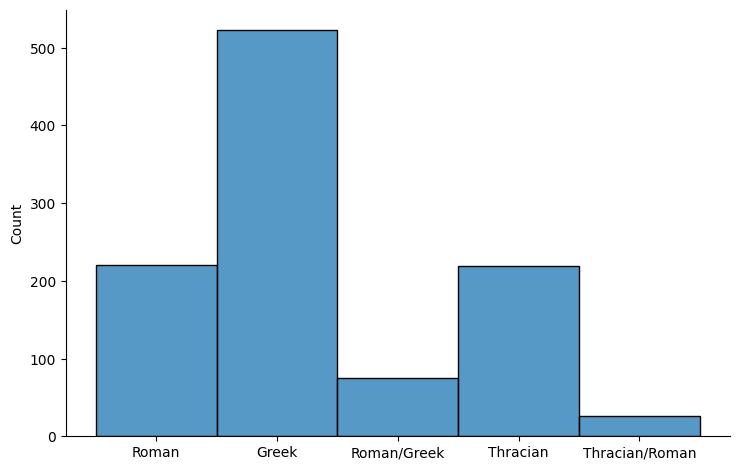

In [75]:
sb.displot(data = Thrace_gen["Ethnicity"].drop(index = rare.index), aspect = 1.5)
plt.xlabel('')
plt.show()

In [83]:
Thrace_gen.rename(columns= {"Libertus/-a":"Libertus", "Father/Master name":"Father_Name", "Ethnicity father/master":"Father_Ethnicity"}, inplace = True)

C:\Users\User.DESKTOP-OR7URI1\AppData\Local\Temp\ipykernel_23608\1732993856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thrace_gen.rename(columns= {"Libertus/-a":"Libertus", "Father/Master name":"Father_Name", "Ethnicity father/master":"Father_Ethnicity"}, inplace = True)


In [98]:
# We can now remove all rows without a father name. 
# Additionally, We should dismiss all individuals who are slaves or freedmen (Libertus), 
# since they are mentioned by their master's name instead of their fathers':

Fathreless = Thrace_gen.query("Slave == True or Libertus == True or Father_Name.isna() or Father_Ethnicity == 'Unknown'").index
Thrace_gen.drop(index = Fathreless, inplace = True)

C:\Users\User.DESKTOP-OR7URI1\AppData\Local\Temp\ipykernel_23608\734081589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Thrace_gen.drop(index = Fathreless, inplace = True)


In [99]:
# We can now look for all individuals whose father's Ethnicity is different than their own:

Multi_Cul = Thrace_gen[Thrace_gen["Father_Ethnicity"] != Thrace_gen["Ethnicity"]]
Multi_Cul.head()

,ID,Name,Ethnicity,Father_Name,Father_Ethnicity,Gender,Citizen,Libertus,Veteranus,Peregrine,Slave
6,3333,Λολλία Κάτυλλα,Greek,Κόϊντος Λόλλιος,Roman,Female,True,False,False,False,False
7,3377,Κρισπῖνα,Roman,Αἰσχύλος,Greek,Female,False,False,False,False,False
10,3380,Ῥοῦφος,Roman,Διόδωρος,Greek,Male,False,False,False,False,False
12,3406,Διόδωρος,Greek,Κοΐντος,Roman,Male,False,False,False,False,False
37,21689,Ὀρόντης,Greek,῎Αβαβος,Thracian,Male,False,False,False,False,False


Text(0.5, 9.444444444444438, '')

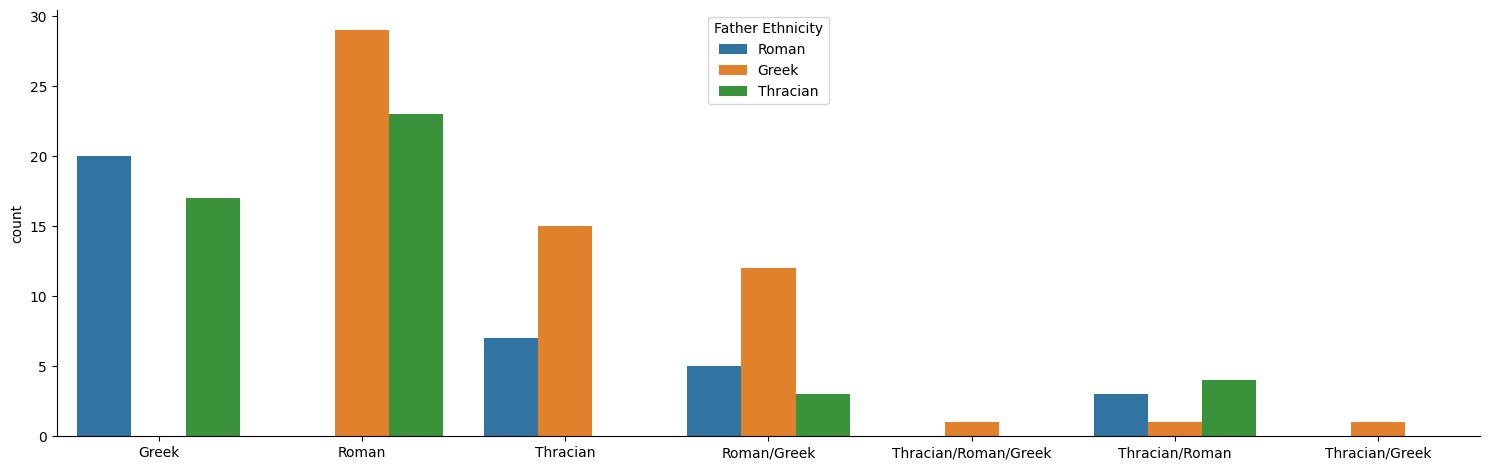

In [100]:
sb.catplot(data = Multi_Cul, x = "Ethnicity", hue = "Father_Ethnicity", aspect = 3, kind = "count", legend_out = False)
plt.legend(loc = 'upper center', title = "Father Ethnicity")
plt.xlabel('')